## Курсовой проект для курса "Python для Data Science"
### Задание:
Используя данные из train.csv, построить
модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели предсказать
цены для квартир из файла test.csv.

Целевая переменная:
Price

Метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

In [1251]:
# Зависимости
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [1252]:
class DataPipeline:
    """Подготовка исходных данных"""
    
    def __init__(self):
        """Параметры класса"""
        self.medians = None
        
    def fit(self, df):
        """Сохранение статистик"""
        # Расчет медиан
        self.medians = df[['Healthcare_1']].median()

    def fill_healthcare_nan(self, df):
        """Заполнение пропусков Healthcare_1"""
        features = ['Ecology_1', 'Social_1', 'Shops_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'A', 'B']
        target = 'Healthcare_1'

        train_df = df[df['Healthcare_1'].notnull()]

        x = train_df[features]
        y = train_df[target]
        model = RandomForestRegressor(max_depth=14, 
                                      n_estimators=300,
                                      random_state=55)
        model.fit(x, y)

        pred_df = df[df['Healthcare_1'].isna()][features]
        y_pred = model.predict(pred_df)

        df.loc[df['Healthcare_1'].isna(), target] = y_pred
        return df
        
    def transform(self, df):
        """Трансформация данных"""
        
        # Обработка категорий
        df = pd.concat([df, pd.get_dummies(df['Ecology_2'])], axis=1)
        df = pd.concat([df, pd.get_dummies(df['Ecology_3'])], axis=1)
        df = pd.concat([df, pd.get_dummies(df['Shops_2'])], axis=1)
        
        # Пропуски
        
        # Healthcare_1
        df = self.fill_healthcare_nan(df)
        
        # По LifeSquare подобрать решение не удалось. Предсказание не показало удовлетворительный r2.
        # У признака высокая корреляция со Square по районам.
        df.drop(columns=['LifeSquare'], inplace=True)

        # Исключение неиспользуемых фич
        df.drop(columns=['Ecology_2', 'Ecology_3', 'Shops_2'], inplace=True)
        
        return df

In [1253]:
def fit_trasform(df):
    pipe = DataPipeline()
    pipe.fit(df)
    return pipe.transform(df)

In [1254]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

In [1255]:
df = fit_trasform(pd.read_csv(TRAIN_DATASET_PATH))
test_df = fit_trasform(pd.read_csv(TEST_DATASET_PATH))

In [1256]:
df.head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,A,B,A,B,A,B
0,14038,35,2.0,47.981561,6.0,7,9.0,1969,0.089040,33,...,997.563333,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,8.0,7,9.0,1978,0.000070,46,...,240.000000,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,0.0,8,12.0,1968,0.049637,34,...,229.000000,1,3,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,9.0,8,17.0,1977,0.437885,23,...,1084.000000,0,5,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,7.0,11,12.0,1976,0.012339,35,...,2078.000000,2,4,150226.531644,0,1,0,1,0,1


In [1257]:
test_df.head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,A,B,A,B,A,B
0,725,58,2.0,49.882643,6.0,6,14.0,1972,0.310199,11,...,1,655.086667,0,0,0,1,0,1,0,1
1,15856,74,2.0,69.263183,1.0,6,1.0,1977,0.075779,6,...,3,1417.116667,0,2,0,1,0,1,0,1
2,5480,190,1.0,13.597819,12.0,2,5.0,1909,0.000000,30,...,87,4702.000000,5,5,0,1,0,1,0,1
3,15664,47,2.0,73.046609,9.0,22,22.0,2007,0.101872,23,...,3,3201.306359,3,3,0,1,0,1,0,1
4,14275,27,1.0,47.527111,1.0,17,17.0,2017,0.072158,2,...,1,271.283333,0,0,0,1,0,1,1,0


In [1258]:
df.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Price            0
A                0
B                0
A                0
B                0
A                0
B                0
dtype: int64

In [1259]:
test_df.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
A                0
B                0
A                0
B                0
A                0
B                0
dtype: int64

### Обработка выбросов тренировочной модели, описание поиска в разделе Дополнительный анализ

In [1260]:
df.loc[df['Id'] == 28, 'Square'] = df.loc[df['Id'] == 28, 'Square'] / 10
df.loc[df['Id'] == 11602, 'Square'] = df.loc[df['Id'] == 11602, 'Square'] / 10
# df.loc[df['Id'] == 11602, 'LifeSquare'] = df.loc[df['Id'] == 11602, 'LifeSquare'] / 10 # TODO: Вернуть, если будет использоваться LifeSquare

id_square_to_drop = ['2307']
df.drop(df[df.Id.isin(id_square_to_drop)].index, inplace=True)

### Генерация нового признака - медианная цена за квадратный метр по району

In [1261]:
df['unit'] = df['Price']/df['Square']
median_price_by_id = df[['DistrictId', 'unit']].groupby('DistrictId')[['unit']].median().reset_index()
df = df.drop('unit', axis=1)
df = pd.merge(df, median_price_by_id, how='left', on='DistrictId')

In [1262]:
# Применение для тестовых данных
test_df = pd.merge(test_df, median_price_by_id, how='left', on='DistrictId')

# Заполнение пропусков медианой
median = median_price_by_id['unit'].median()
test_df[['unit']] = test_df[['unit']].fillna(median)

### Стандартизация признаков

In [1263]:
features_to_scale = ['Healthcare_1', 'Square', 'KitchenSquare', 'Ecology_1', 'Social_2', 'unit']
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[features_to_scale])
df[features_to_scale] = stand_features

### ML

In [1264]:
# # Поиск лучших параметров
# # Закоментировано для экономии времени
# parameters = {
#     'n_estimators': [200, 250, 300],
#     'max_depth': np.arange(11, 14),
# }

# clf = GridSearchCV(
#     estimator=RandomForestRegressor(),
#     param_grid=parameters,
#     scoring='r2',
#     cv=5,
# )

# clf.fit(x, y)

In [1265]:
# clf.best_params_
# Лучшие параметры: 13, 250

In [1266]:
# cv_results = pd.DataFrame(clf.cv_results_)

# cv_results.columns

# param_columns = [
#     column
#     for column in cv_results.columns
#     if column.startswith('param_')
# ]

# score_columns = ['mean_test_score']

# cv_results = (cv_results[param_columns + score_columns]
#               .sort_values(by=score_columns, ascending=False))

# cv_results.head(10)

In [1267]:
# Обучение
x = df.set_index('Id').drop(columns=['Price'])
y = df.Price

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(criterion='mse',
                             max_depth=13,
                             n_estimators=250,
                             random_state=55)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2(y_test, y_pred)

0.7270631806260999

In [1268]:
y_pred_train = model.predict(x_train)
r2(y_train, y_pred_train)

0.9410903304442744

### Final

In [1269]:
# Scale
stand_features = scaler.transform(test_df[features_to_scale])
test_df[features_to_scale] = stand_features

# ML
model.fit(x, y)
test_df['Price'] = model.predict(test_df.set_index('Id'))

In [1270]:
test_df.head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Helthcare_2,Shops_1,A,B,A,B,A,B,unit,Price
0,725,58,2.0,-0.328238,-0.009556,6,14.0,1972,1.607753,11,...,0,0,0,1,0,1,0,1,-0.980745,162495.457463
1,15856,74,2.0,0.683813,-0.184621,6,1.0,1977,-0.361847,6,...,0,2,0,1,0,1,0,1,-0.610379,208601.641818
2,5480,190,1.0,-2.223030,0.200521,2,5.0,1909,-0.998541,30,...,5,5,0,1,0,1,0,1,4.730225,360971.102452
3,15664,47,2.0,0.881383,0.095483,22,22.0,2007,-0.142608,23,...,3,3,0,1,0,1,0,1,0.254656,341772.796268
4,14275,27,1.0,-0.451244,-0.184621,17,17.0,2017,-0.392272,2,...,0,0,0,1,0,1,1,0,-1.169976,145301.271159


In [1271]:
test_df[['Id', 'Price']].to_csv('13.04.2021_1451.csv', index=False)

## Дополнительный анализ

#### LifeSquare

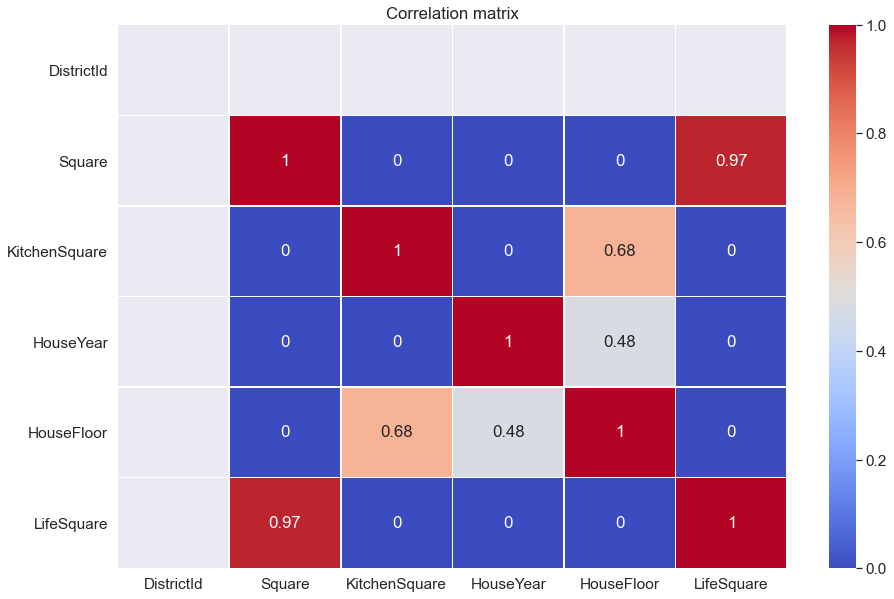

In [1272]:
df = pd.read_csv(TRAIN_DATASET_PATH)

plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

columns = ['DistrictId', 'Square', 'KitchenSquare', 'HouseYear', 'HouseFloor', 'LifeSquare']
corr_matrix = df.loc[df['DistrictId'] == 35, columns].corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.510e+02, 4.300e+01,
        0.000e+00, 5.870e+02, 7.800e+01, 1.440e+02, 1.983e+03, 6.970e+02,
        2.286e+03, 3.322e+03]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

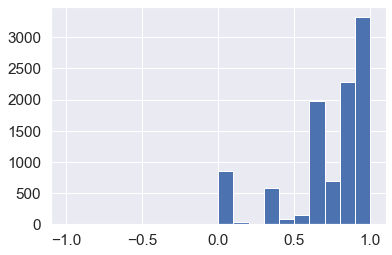

In [1273]:
# Видна корреляция между LifeSquare и Square
# Проверка распределения
corrs = [df.loc[df['DistrictId'] == DistrictId, ['Square', 'LifeSquare']]
         .corr()
         .loc['LifeSquare', 'Square'] for DistrictId in df['DistrictId'].values]
corrs = np.round(corrs, 2)
plt.hist(corrs, bins=20)

#### Выбросы Square

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Square'>

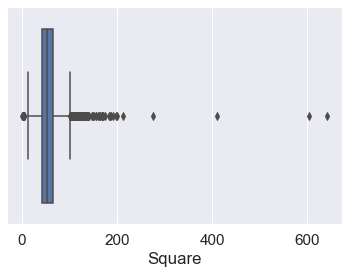

In [1274]:
sns.boxplot(df['Square'], whis=1.5)

In [1275]:
df[df['Square'] > 250]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562


- id 5548 - ok

In [1276]:
df[(df['DistrictId'] == 9) & (df['HouseYear'] == 1977) & (df['HouseFloor'] == 18)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
732,2989,9,2.0,64.109296,NaN,1.0,9,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,188401.620801
849,15152,9,1.0,45.822779,NaN,1.0,14,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,130517.961984
1087,8599,9,3.0,83.380811,NaN,1.0,9,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,235321.325281
1545,4844,9,2.0,64.139262,NaN,1.0,12,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,182427.132446
2520,5918,9,4.0,122.500246,NaN,1.0,19,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,347736.968943
2879,7035,9,1.0,43.591764,NaN,1.0,6,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,129277.641445
3393,8348,9,1.0,46.062447,NaN,1.0,7,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,132634.913065
3649,15639,9,2.0,62.455812,NaN,1.0,10,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,185365.709186
4165,177,9,3.0,82.758090,81.392268,1.0,11,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,237213.091873
4169,4155,9,2.0,60.026795,63.611892,1.0,11,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,177896.144561


- id 28 - На примере похожих квартир, Square д.б. 60.4705972

In [1277]:
df[(df['DistrictId'] == 102) & (df['HouseFloor'] == 4.0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.43083


- id 2307 - ошибочные данные. Огромная площадь, и слишком малая цена. Жилая и площадь кухни больше общей. Похожих домов в районе нет. Дроп.

In [1278]:
df[(df['DistrictId'] == 30) & (df['HouseFloor'] == 19.0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
649,8460,30,2.0,58.325878,56.077128,1.0,19,19.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,145015.067462
980,2434,30,2.0,61.424774,61.519472,13.0,3,19.0,2015,0.000078,B,B,22,6398,141,1046.0,3,23,B,133166.163513
2309,10285,30,1.0,32.271741,3.386009,1.0,4,19.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,105921.018210
2768,4072,30,2.0,81.375201,NaN,1.0,20,19.0,2015,0.000078,B,B,22,6398,141,1046.0,3,23,B,167235.215456
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
7744,12595,30,2.0,60.585326,NaN,1.0,4,19.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,138250.149821
8190,1745,30,2.0,69.635744,39.015229,10.0,7,19.0,2012,0.000078,B,B,22,6398,141,1046.0,3,23,B,235554.938492


- id 11602 - ошибочные данные. Square и LifeSquare д.б. в 10 раз меньше.

#### Анализ влияния Ecology_1 на цены

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


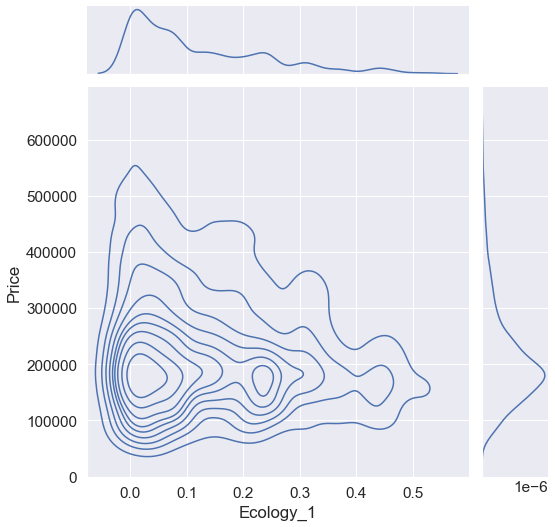

In [1279]:
df = pd.read_csv(TRAIN_DATASET_PATH)
grid = sns.jointplot(df['Ecology_1'], df['Price'], kind='kde')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

#### Распределение целевой переменной

In [1280]:
def distribution_plot(series, label):
    plt.figure(figsize=(16, 8))

    mean = round(series.mean(), 2)
    median = series.median()

    plt.subplot(121)
    series.hist(density=False, bins=20)
    plt.ylabel('count')
    plt.xlabel(label)

    y = np.linspace(0, 2000, 2)
    plt.plot([mean] * 2, y, label='mean', linewidth=4)
    plt.plot([median] * 2, y, label='median', linewidth=4)
    plt.legend()

    plt.subplot(122)
    sns.kdeplot(series, shade=True, legend=False)
    plt.xlabel(label)

    plt.suptitle(label)
    plt.show()

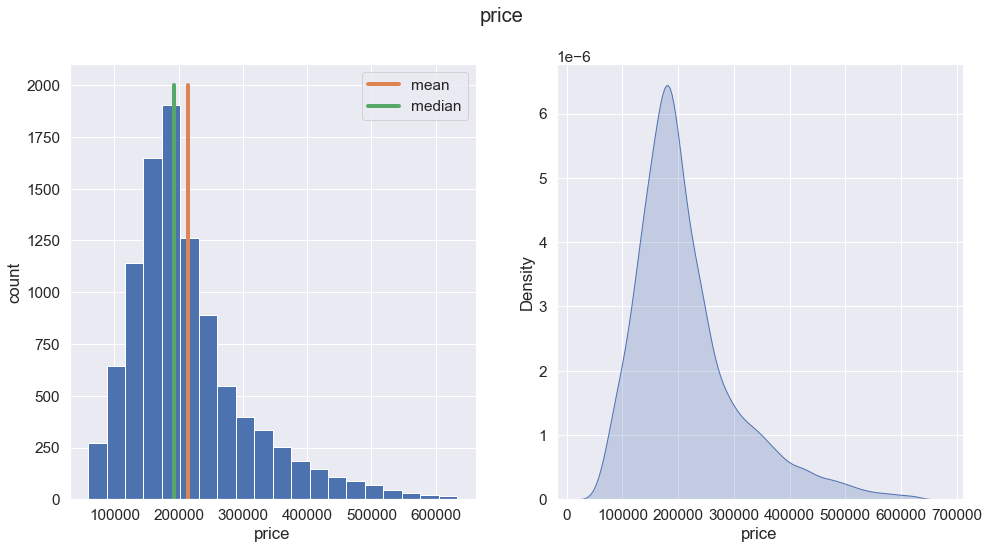

In [1281]:
target = df['Price']
distribution_plot(target, 'price')

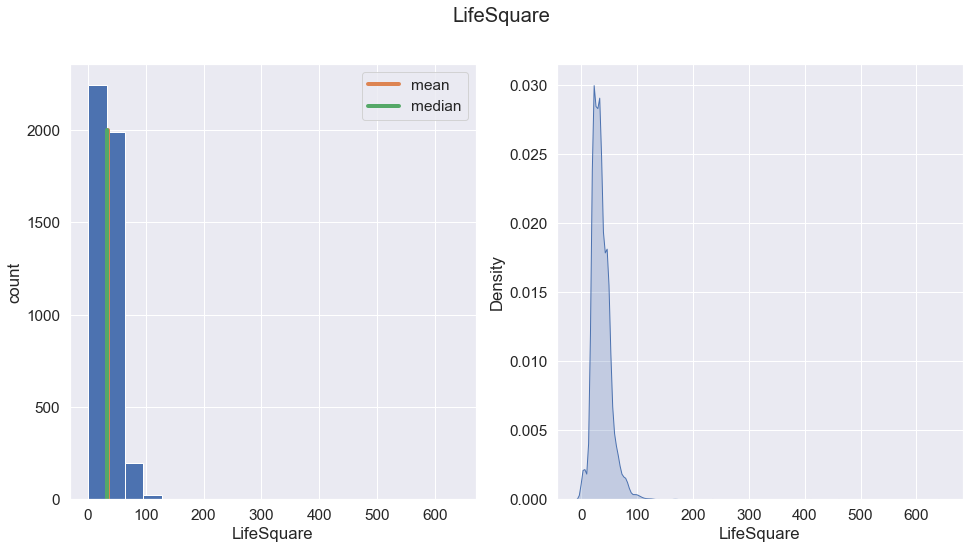

In [1282]:
# Распределение LifeSquare
distribution_plot(df.dropna()['LifeSquare'], 'LifeSquare')

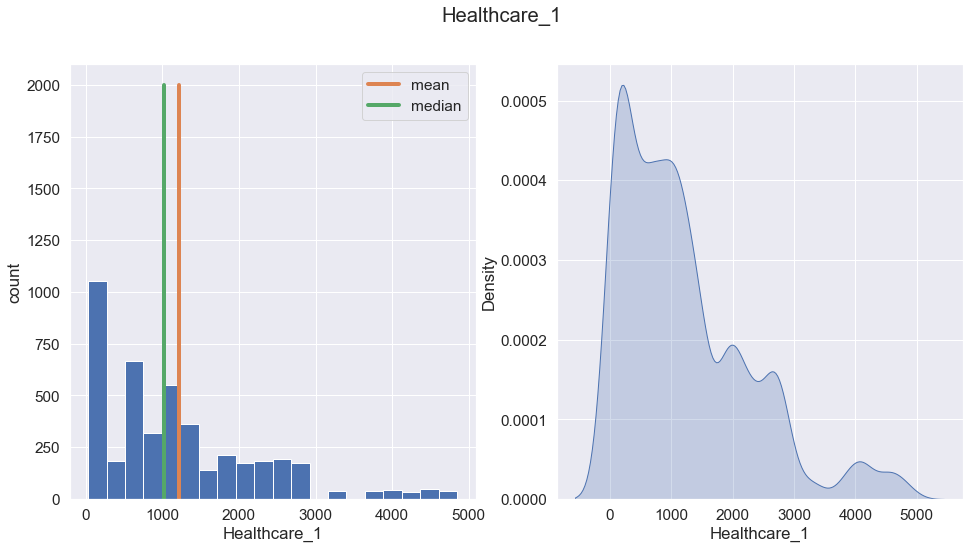

In [1283]:
# Распределение Healthcare_1
distribution_plot(df.dropna()['Healthcare_1'], 'Healthcare_1')

#### Количественные признаки

In [1284]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features = df_num_features.drop('Price', axis=1)
df_num_features.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4
